Which month has the highest rate of of bird strikes?

In [1]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [2]:
#Create file path
file = 'Resources/Cleaned_data.csv'
cbs_df = pd.read_csv(file)

#Replace any potential NAs with 0
cbs_df['Fatalities'].fillna(0,inplace = True)

#Not necessary but just in case set type to float
cbs_df["Fatalities"] = cbs_df.loc[:, "Fatalities"].astype(float)
cbs_df

/Users/rafael/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
4,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133551,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
133552,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
133553,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
133554,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
#Calculate the total amount of bird hits by month = "numerical value"
month_counts = cbs_df["Incident Month"].value_counts(sort=False)
month_counts

1      4625
2      4247
3      6857
4     10176
5     13757
6     10335
7     15226
8     17985
9     18625
10    17064
11     9340
12     5319
Name: Incident Month, dtype: int64

In [4]:
#Group the bird hits by month to get the total amount of "Fatalities per month"
month_group = cbs_df.groupby("Incident Month")
#Use sum function instead of value_counts to add the true value of fatalities per month
#and not just how many death occurances per month
fatality_count = month_group["Fatalities"].sum()

#Check the fatality count is 26 like in the csv
fatality_count

Incident Month
1     8.0
2     1.0
3     8.0
4     0.0
5     2.0
6     1.0
7     3.0
8     0.0
9     0.0
10    2.0
11    0.0
12    1.0
Name: Fatalities, dtype: float64

In [5]:
#Find the percent of fatalities per month (total fatalities per month / total bird hits by month)
fatalities_percent_month = (fatality_count / month_counts) * 100
fatalities_percent_month

Incident Month
1     0.172973
2     0.023546
3     0.116669
4     0.000000
5     0.014538
6     0.009676
7     0.019703
8     0.000000
9     0.000000
10    0.011721
11    0.000000
12    0.018801
dtype: float64

In [6]:
#Group bird hits by month to find the total "Injuries" in that month
#again use the sum function to get the total amount of injuries per month and not just occurance
injury_count = month_group["Injuries"].sum()

#Find percent of injuries per month (total injuries per month / total bird hits by month)
injury_percent_month = (injury_count / month_counts) * 100
injury_percent_month

injury_percent_month

Incident Month
1     2.464865
2     0.565105
3     0.408342
4     0.245676
5     0.159919
6     0.416062
7     0.137922
8     0.127884
9     0.139597
10    0.128926
11    0.235546
12    0.338409
dtype: float64

In [7]:
#Create full dataframe with the set of series we have created
full_month_dicts = {"Bird Hits": month_counts,
               "Fatalities": fatality_count,
                "Injuries": injury_count,
                "Fatality Rate Per Month":fatalities_percent_month,
              "Injury Rate Per Month": injury_percent_month}

#Create a dataframe with only fatality and injury rate for comparison purposes and chart
part_month_dicts = {"Fatality Rate Per Month":fatalities_percent_month,
                    "Injury Rate Per Month": injury_percent_month,
                   }

part_month_df = pd.DataFrame(part_month_dicts)
part_month_df

,Fatality Rate Per Month,Injury Rate Per Month
Incident Month,,
1,0.172973,2.464865
2,0.023546,0.565105
3,0.116669,0.408342
4,0.000000,0.245676
5,0.014538,0.159919
6,0.009676,0.416062
7,0.019703,0.137922
8,0.000000,0.127884
9,0.000000,0.139597


In [8]:
#incident_month_name = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#part_month_df["Month"] = incident_month_name

#part_month_df.set_index(['Month'])

#part_month_df

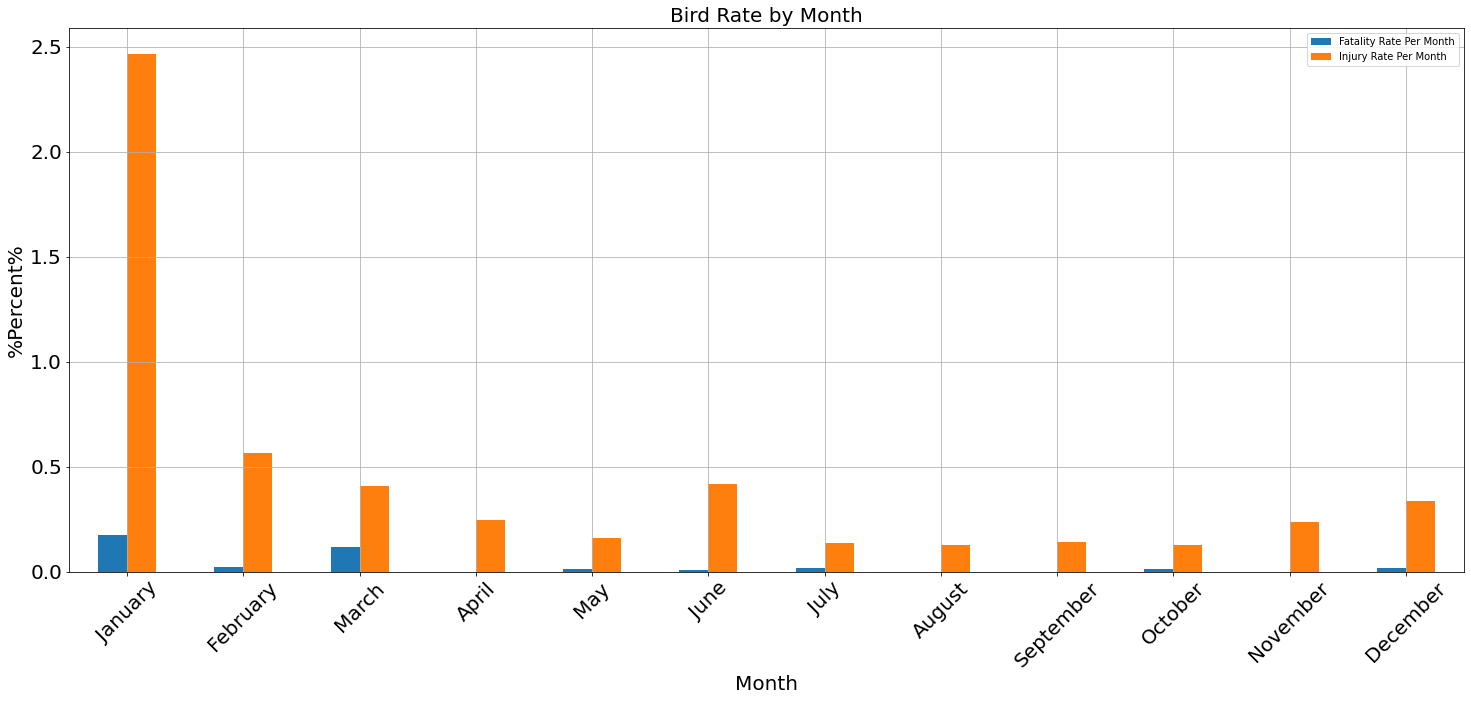

In [9]:
# Create a bar chart based upon the above data
bar_chart=part_month_df.plot(kind='bar', figsize=(25,10),fontsize=20)

#Set the ticks to show each month's label
bar_chart.set_xticklabels( ('January', 'February','March','April','May','June','July','August','September','October','November','December'),rotation=45,fontsize=20 )

#Fix the format of the chart so that the labels are relative to the data box/chart
bar_chart.set_title('Bird Rate by Month',fontsize=20)
bar_chart.set_xlabel('Month',fontsize=20)
bar_chart.set_ylabel('%Percent%',fontsize=20)

plt.grid()
plt.show()

Observations: We can see from the box chart that January has the highest rate of Injuries AND Fatalities which is interesting to see as August has the highest rate of bird hits per month

Observations: The biggest threat to human's are injuriese as opposed to fatalities which is a little more reassuring